In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2. Load the dataset
df = pd.read_csv("OCD Patient Dataset_ Demographics & Clinical Data.csv")
print(df.shape)
display(df.head())

(1500, 17)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [4]:
# 3. Fill missing values for categorical columns
df['Previous Diagnoses'].fillna('Unknown', inplace=True)
df['Medications'].fillna('Unknown', inplace=True)
print(df.isnull().sum())

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64


In [5]:
# 4. Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [6]:
# 5. Drop unnecessary columns
X = df.drop(columns=["Patient ID", "OCD Diagnosis Date", "Medications"])
y = df["Medications"]

In [7]:
# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

RandomForest Accuracy: 0.2400
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.25      0.22        77
           1       0.33      0.35      0.34        75
           2       0.16      0.13      0.14        71
           3       0.29      0.23      0.26        77

    accuracy                           0.24       300
   macro avg       0.24      0.24      0.24       300
weighted avg       0.24      0.24      0.24       300



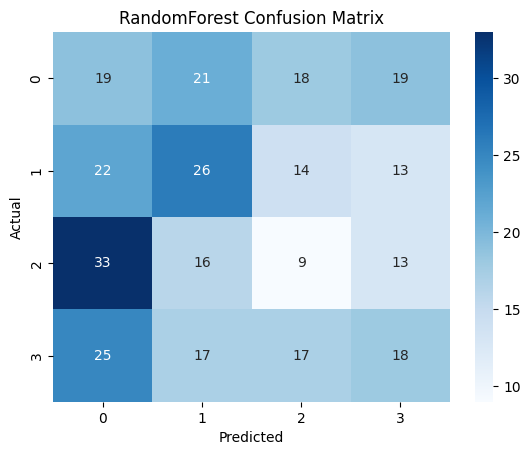

XGBoost Accuracy: 0.2467
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.26      0.24        77
           1       0.27      0.25      0.26        75
           2       0.22      0.23      0.22        71
           3       0.29      0.25      0.27        77

    accuracy                           0.25       300
   macro avg       0.25      0.25      0.25       300
weighted avg       0.25      0.25      0.25       300



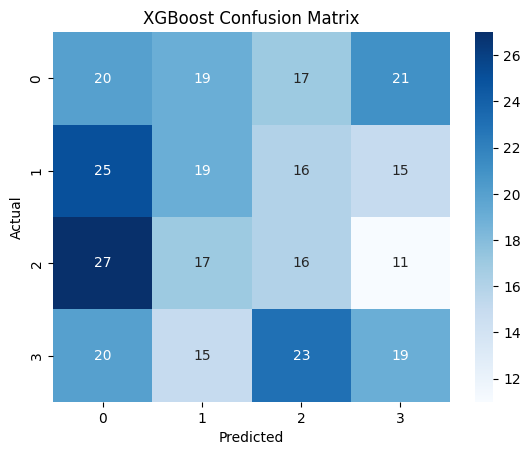

In [9]:
# 8. Train RandomForest and XGBoost models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

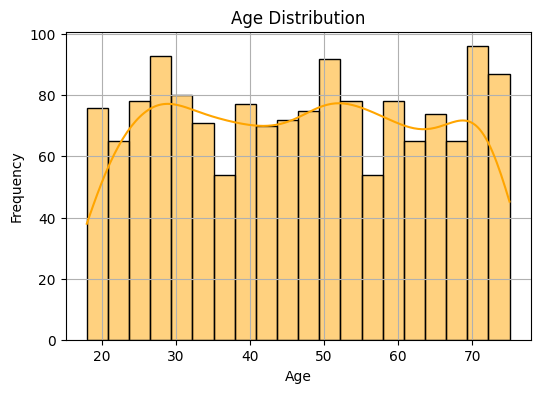

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color='orange')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

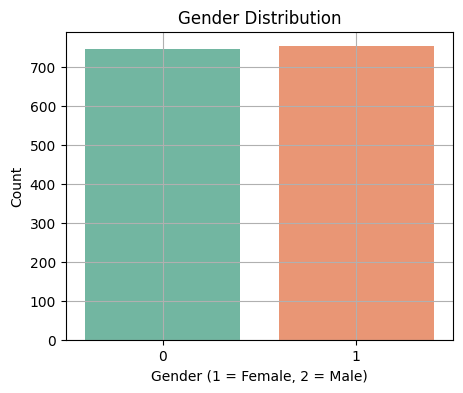

In [11]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender (1 = Female, 2 = Male)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

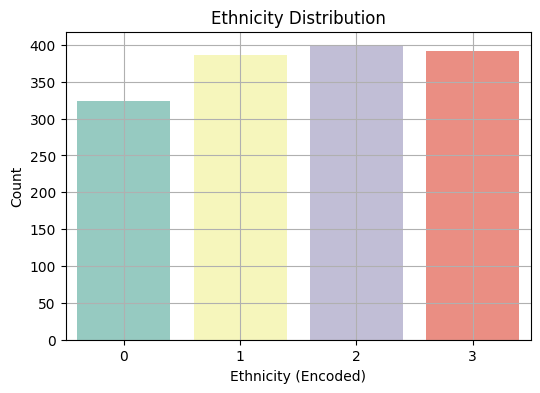

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Ethnicity", data=df, palette="Set3")
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity (Encoded)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

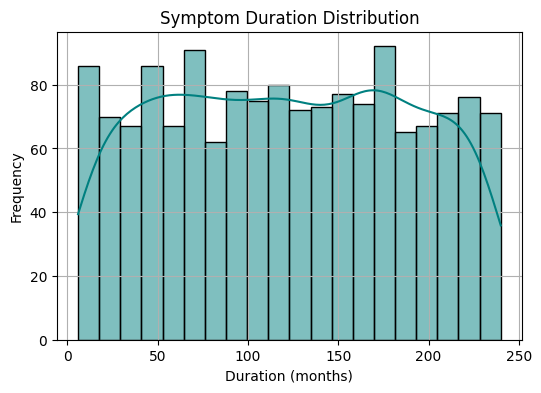

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Duration of Symptoms (months)"], bins=20, kde=True, color='teal')
plt.title("Symptom Duration Distribution")
plt.xlabel("Duration (months)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

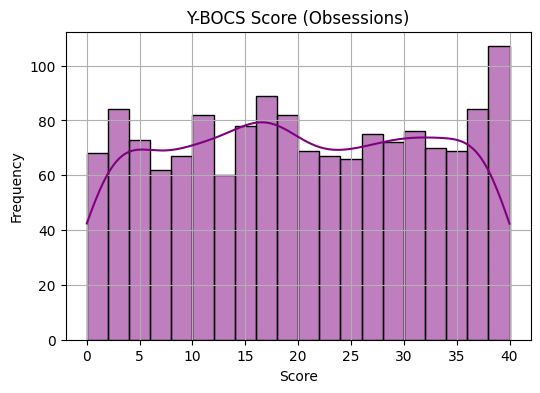

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Y-BOCS Score (Obsessions)"], bins=20, kde=True, color='purple')
plt.title("Y-BOCS Score (Obsessions)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

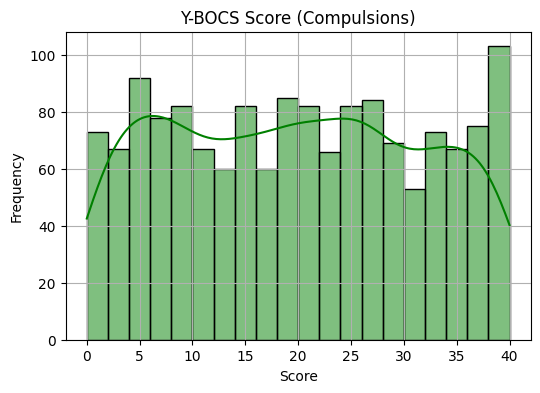

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Y-BOCS Score (Compulsions)"], bins=20, kde=True, color='green')
plt.title("Y-BOCS Score (Compulsions)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [16]:

# statistics for skewness & kurtosis
features = [
    "Age", "Gender", "Ethnicity", "Marital Status", "Education Level",
    "Duration of Symptoms (months)", "Previous Diagnoses",
    "Family History of OCD", "Obsession Type", "Compulsion Type",
    "Y-BOCS Score (Obsessions)", "Y-BOCS Score (Compulsions)",
    "Depression Diagnosis", "Anxiety Diagnosis"
]

skew_kurt_data = []

for feat in features:
    skew_val = df[feat].skew()
    kurt_val = df[feat].kurt()
    skew_kurt_data.append({"Feature": feat, "Skewness": skew_val, "Kurtosis": kurt_val})

# Create DataFrame
skew_kurt_df = pd.DataFrame(skew_kurt_data)

# Round for better readability
skew_kurt_df = skew_kurt_df.round(3)

# Display the summary
display(skew_kurt_df.style.background_gradient(cmap='PuBu', subset=["Skewness", "Kurtosis"]))

,Feature,Skewness,Kurtosis
0,Age,0.005000,-1.207000
1,Gender,-0.008000,-2.003000
2,Ethnicity,-0.080000,-1.303000
3,Marital Status,-0.035000,-1.489000
4,Education Level,-0.020000,-1.374000
5,Duration of Symptoms (months),0.007000,-1.185000
6,Previous Diagnoses,0.081000,-1.245000
7,Family History of OCD,-0.027000,-2.002000
8,Obsession Type,0.060000,-1.304000
9,Compulsion Type,0.007000,-1.327000
